In [1]:
from pathlib import Path
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from palettable.cartocolors.qualitative import Safe_4

In [2]:
SAVE = True
BASE_DIR = Path("../data/metrics/deuce_probabilistic_metrics")
SAVE_DIR = Path("../data/figures")

plt.style.use("bmh")
hex_colors = Safe_4.hex_colors
methods_params = {
    "steps" : {
        "color" : hex_colors[0], 
        "label" : "STEPS",
    },
    "bcnn" : {
        "label" : "DEUCE",
        "color" : hex_colors[2], 
    },
    "bcnn member" : {
        "label" : "DEUCE member",
        "color" : hex_colors[2],
        "linestyle": "dashed", 
    },
    "linda-p" : {
        "label" : "LINDA-P",
        "color" : hex_colors[1], 
    },
    "linda-d" : {
        "label" : "LINDA-D",
        "color" : hex_colors[1], 
    },
    "extrapolation" : {
        "label" : "Extrapolation",
        "color" : hex_colors[3], 
    },
}

In [3]:
rankhist = [xr.open_dataarray(p) for p in BASE_DIR.glob("*.nc") if "RANK" in str(p)]
rankhist = xr.Dataset(data_vars={arr.name : arr for arr in rankhist}) 

In [4]:
rankhist

<xarray.Dataset>
Dimensions:   (rank: 49, leadtime: 4)
Coordinates:
  * rank      (rank) int32 0 1 2 3 4 5 6 7 8 9 ... 39 40 41 42 43 44 45 46 47 48
  * leadtime  (leadtime) int32 1 3 6 12
Data variables:
    bcnn      (leadtime, rank) float64 ...
    linda-p   (leadtime, rank) float64 ...
    steps     (leadtime, rank) float64 ...

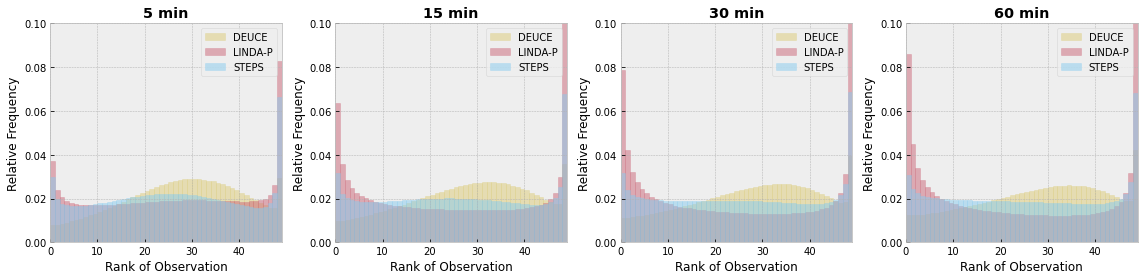

In [5]:
fig, axs = plt.subplots(ncols=len(rankhist.leadtime), figsize=(4*len(rankhist.leadtime),4))

for i,lt in enumerate(rankhist.leadtime):
    for model in rankhist:
        axs[i].bar(
            x=rankhist["rank"],
            height=rankhist[model].sel(leadtime=lt),
            width=1,
            align="edge",
            color=methods_params[model]["color"],
            edgecolor=methods_params[model]["color"],
            alpha=0.5,
            label=methods_params[model]["label"]
            )
    axs[i].legend()
    axs[i].set_ylim([0,0.1])
    axs[i].set_xlim([0,49])
    axs[i].set_xlabel("Rank of Observation")
    axs[i].set_ylabel("Relative Frequency")
    axs[i].set_title(f"{lt.values*5} min", fontweight="semibold")
fig.tight_layout()

if SAVE:
    fig.savefig(SAVE_DIR / "RANKHIST_ALL.pdf",bbox_inches='tight')

In [6]:
crps = [xr.open_dataarray(p) for p in BASE_DIR.glob("*.nc") if "CRPS" in str(p)]
crps = xr.Dataset(data_vars={arr.name : arr for arr in crps}) 

In [7]:
crps

<xarray.Dataset>
Dimensions:   (leadtime: 12)
Coordinates:
  * leadtime  (leadtime) int32 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    bcnn      (leadtime) float64 ...
    linda-p   (leadtime) float64 ...
    steps     (leadtime) float64 ...

In [8]:
for model in crps:
    print(model, crps[model].mean().values)

bcnn 1.292987762503554
linda-p 1.4299262794653254
steps 1.2661120146365878


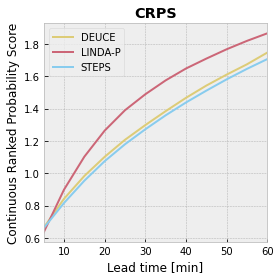

In [9]:
fig, ax = plt.subplots(figsize=(4,4))
for model in crps:
    ax.plot(crps.leadtime * 5, crps[model], c=methods_params[model]["color"], label=methods_params[model]["label"])
ax.set_xlim([5,60])
ax.set_xlabel("Lead time [min]")
ax.set_ylabel("Continuous Ranked Probability Score")
ax.set_title("CRPS", fontweight="semibold")
ax.legend()
fig.tight_layout()

if SAVE:
    fig.savefig(SAVE_DIR / "CRPS_ALL.pdf",bbox_inches='tight')